# Autoencoder For Dimensionality Reduction

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Creating a Dataset

In [114]:
from sklearn.datasets import make_blobs

In [115]:
data = make_blobs(n_samples = 300, 
                  n_features = 2, 
                  centers = 2, 
                  cluster_std = 1.0, 
                  random_state = 101)

In [116]:
X, y = data

In [117]:
X

array([[ -8.87772115,  -6.76007802],
       [  0.630638  ,   3.10707466],
       [ -0.24060881,   2.82068999],
       [ -7.83909113,  -8.20754485],
       [-10.9729082 ,  -7.39067645],
       [-10.81648852,  -5.82372891],
       [  0.96977807,   0.50825184],
       [-10.29728144,  -7.21832357],
       [  0.04271579,   3.50389089],
       [  0.15391601,   2.19349145],
       [ -9.81008003,  -5.35480445],
       [-11.18334003,  -6.7004804 ],
       [  0.51876688,   3.39210906],
       [ -8.09111654,  -6.92631627],
       [  1.1112886 ,   0.704398  ],
       [ -7.49469451,  -7.06186612],
       [ -0.75249891,   2.31574949],
       [  0.72046137,   1.63484242],
       [ -0.80867204,   1.41371822],
       [  1.13010192,  -0.25418504],
       [-10.6252148 ,  -6.71479817],
       [ -0.06311641,   3.15682868],
       [  0.56609951,   3.41000402],
       [ -9.10474956,  -7.83047821],
       [-11.33926304,  -7.83622233],
       [  0.29639341,   2.06317757],
       [ -0.52722349,   2.95534215],
 

In [118]:
y

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0])

## Adding another feature for Noise

In [119]:
np.random.seed(seed = 101)

z_noise = np.random.normal(size = X.shape[0])
z_noise = pd.Series(z_noise)

In [120]:
z_noise

0      2.706850
1      0.628133
2      0.907969
3      0.503826
4      0.651118
         ...   
295    1.523750
296    1.290230
297   -1.478319
298    0.214234
299   -0.240510
Length: 300, dtype: float64

In [121]:
feat = pd.DataFrame(X)

In [122]:
feat.head()

,0,1
0,-8.877721,-6.760078
1,0.630638,3.107075
2,-0.240609,2.820690
3,-7.839091,-8.207545
4,-10.972908,-7.390676


In [123]:
feat = pd.concat([feat, z_noise], axis = 1)

In [124]:
feat.columns = ['X1', 'X2', 'X3']

In [125]:
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


## EDA (Exploratory Data Analysis)

In [72]:
plt.scatter(feat['X1'], feat['X2'], c = y)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [73]:
from mpl_toolkits.mplot3d import Axes3D

In [74]:
%matplotlib notebook

In [75]:
fig = plt.figure()

ax = fig.add_subplot(111, projection = '3d')

ax.scatter(feat['X1'], feat['X2'], feat['X3'])

<IPython.core.display.Javascript object>

### For colab

**Above will produce interactive 3D output in Jupter Notebook but for Colab you can use below code**

In [88]:
import plotly.express as px

fig = px.scatter_3d(data_frame = feat, x = 'X1', y = 'X2', z = 'X3', color = y, width = 900)

fig.update_traces(marker=dict(size= 2.5))

fig.show()

## Creating Autoencoder

In [187]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

**Note: In Autorencoders Input neurons and Output neurons are same**

In [188]:
encoder = Sequential()

encoder.add(Dense(units = 2, activation = 'relu', input_shape = [3]))

In [189]:
decoder = Sequential()

decoder.add(Dense(units = 3, activation = 'relu', input_shape = [2]))

In [190]:
autoencoder = Sequential([encoder, decoder])

In [191]:
autoencoder.compile(loss = 'mse', optimizer = SGD(learning_rate = 1.5))

### Scaling Data

In [192]:
from sklearn.preprocessing import MinMaxScaler

In [193]:
scaler = MinMaxScaler()

feat_scaled = scaler.fit_transform(feat)

### Train Autoencoder

In [204]:
autoencoder.fit(feat_scaled, feat_scaled, epochs = 5)

Epoch 1/5
10/10 [==============================] - 0s 1ms/step - loss: 0.0169
Epoch 2/5
10/10 [==============================] - 0s 2ms/step - loss: 0.0174
Epoch 3/5
10/10 [==============================] - 0s 1ms/step - loss: 0.0225
Epoch 4/5
10/10 [==============================] - 0s 1ms/step - loss: 0.0166
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 0.0313


## Aftermath

In [205]:
encoded_2dim = encoder.predict(feat_scaled)

In [ ]:
encoded_2dim

In [197]:
encoded_2dim.shape

(300, 2)

In [198]:
feat_scaled.shape

(300, 3)

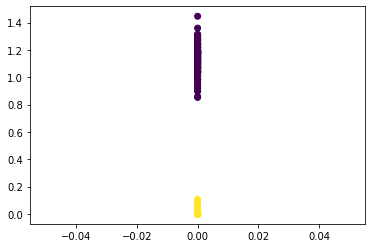

In [206]:
plt.scatter(x = encoded_2dim[:, 0], y = encoded_2dim[:, 1], c = y)